# Analisi dei Metadati dei Dataset della PA

To Do - API_Dati_Pubblici
1. Verifica i DS senza Metadati
2. Implementa funzione in API_Dati_Pubblici che recupera in ordine di importanza le resources con un certo mymetype sulla base del machine-readble, nel seguente ordine: json, rdf, xml, csv,xls, altrimenti quello che c'è
3. Schedula scarico mensile e ingestion, oppure automatizza tweet con un grafico

To Do - Analisi DS
1. Numero Dataset
2. Numero Dataset senza metadati
3. Group by Catalogo -> Bar chart
4. Group by Gruppo -> Bar Chart
5. Group by Ultima Modifica -> Time series chart
6. Word Cloud su Titolo -> vedi incident
7. Word Cloud su Notes -> vedi incident

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
get_ipython().magic('pylab inline')

Populating the interactive namespace from numpy and matplotlib


In [10]:
df = pd.read_csv('2017-10-17_DSMetadatiPA.csv', delimiter=';')

### 1. Numero Dataset PA

In [19]:
df['ds_name'].count()

18165

### 2. Numero Dataset PA senza Metadati

In [20]:
df[pd.isnull(df['ds_title'])]['ds_name'].count()

5042

In [17]:
# Check DS senza metadati
# http://www.dati.gov.it/api/3/action/package_show?id=organico-comune-bari
df_test = df[pd.isnull(df['ds_title'])][-5:]
df_test

,Unnamed: 0,ds_title,_catalog_parent_name,gruppo,note,ultima_modifica,ds_name,ds_id,ds_license,url,mymtype
18054,18054,NaN,NaN,NaN,NaN,NaN,anpil,NaN,NaN,NaN,NaN
18102,18102,NaN,NaN,NaN,NaN,NaN,camp-italy-area-1-linea-riva-giugno-2016-armon...,NaN,NaN,NaN,NaN
18130,18130,NaN,NaN,NaN,NaN,NaN,camp-italy-area-1-linea-riva-maggio-2016-armon...,NaN,NaN,NaN,NaN
18133,18133,NaN,NaN,NaN,NaN,NaN,camp-italy-area-2-linea-riva-armonizzato,NaN,NaN,NaN,NaN
18163,18163,NaN,NaN,NaN,NaN,NaN,mappe-storiche-dimpianto,NaN,NaN,NaN,NaN


In [18]:
df.head(2)

,Unnamed: 0,ds_title,_catalog_parent_name,gruppo,note,ultima_modifica,ds_name,ds_id,ds_license,url,mymtype
0,0,NaN,NaN,NaN,NaN,NaN,circoscrizioni,NaN,NaN,NaN,NaN
1,1,Elezioni Amministrative 2014 - Eletti,Comune di Bari,Popolazione e società,<p>Gli eletti delle Amministrative e Municipi...,2014-12-17,elezioni-amministrative-2014-eletti,ebad7b1c-ca8c-4dda-ac1f-a9f550e8fac6,CC0 1.0,NaN,NaN


### 3. Group by Catalogo Padre

In [72]:
df_cat = df.groupby(['_catalog_parent_name']).count().reset_index().sort_values(by='ds_name', ascending=False).set_index('_catalog_parent_name')

In [73]:
df_cat.head(2)

,Unnamed: 0,ds_title,gruppo,note,ultima_modifica,ds_name,ds_id,ds_license,url,mymtype
_catalog_parent_name,,,,,,,,,,
Dati trentino,5798,5798,1295,5798,5798,5798,5798,5798,5791,5790
Regione Toscana,2374,2374,1297,2374,2374,2374,2374,2374,2360,2175


In [75]:
# Primi 10 elementi per numero di dataset
df_cat_10 = df_cat['ds_name'][:10]
df_cat_10.sum()

12196

In [76]:
# resto degli elementi
df_cat['ds_name'][11:].count()

21

In [77]:
# Numero di dataset sul resto degli elementi
df_cat['ds_name'][11:].sum()

794

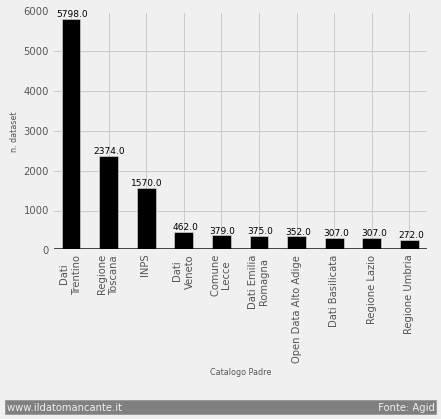

In [102]:
#Grafico
style.use('fivethirtyeight')
colors = [[213/255,94/255,0]]
tp = df_cat_10.plot(
    kind='bar',
    legend = False,
    figsize = (6,4),
    color = colors)

for p in tp.patches:
    tp.annotate(str(round(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), ha='center', va='center', xytext=(10, 5), textcoords='offset points',fontsize=9)
    tp.plot()

tp.tick_params(axis = 'both', which = 'major', labelsize = 10)
tp.set_xlabel('Catalogo Padre',fontsize=8)
tp.set_ylabel('n. dataset',fontsize=8)

tp.axhline(y = 0, color = 'black', linewidth = 4, alpha = 0.7)

labels = [item.get_text() for item in tp.get_xticklabels()]
labels[0] = 'Dati \nTrentino'
labels[1] = 'Regione \nToscana'
labels[3] = 'Dati \nVeneto'
labels[4] = 'Comune \nLecce'
labels[5] = 'Dati Emilia \nRomagna'

tp.set_xticklabels(labels)
#plt.xticks(rotation=0)

text = tp.text(x = -1.7, y = -4000,
    s = 'www.ildatomancante.it                                                                                  Fonte: Agid',
    fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')
text.set_url('http://www.ildatomancante.it')

fig_posts = tp.get_figure()